<a href="https://colab.research.google.com/github/songhakim/Drogue_gun_choked_flow/blob/main/choked_flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [189]:
import numpy as np
import scipy as sp
import math
import matplotlib
import matplotlib.pyplot as plt

In [190]:
# Set up some example parameters to test
R = 287 #specific gas constant of air (J/kgK)
Tt  = T = 233 # -40 degree at 30 km, assumed isothermal
A = 0.01227 # cross-sectional area (m3)
gamma = 1.4 
vt = 1.18 * 10** (-4) # tank volume (m3) typical 88g co2 cartridges volume(118ml)
pt0 = 60* 10**5 # initial tank pressure (pa)
mt0 = pt0 * vt / (R * Tt)
print("initial m_gas in tank: ", mt0, "kg")
m_slug = 0.6 #(kg)
c = A * math.sqrt(gamma/(Tt*R)) * ((gamma + 1)/2)**((gamma + 1)/(2*(1- gamma))) # assumed choked flow: mdot = c * pressure in tank
print("c= ", c)
alpha = R * Tt / vt
L = 0.4
print(c*alpha*mt0)


initial m_gas in tank:  0.010587549161819025 kg
c=  3.248971738014228e-05
194.93830428085369


In [202]:
N = np.int16(1e6)
t = np.linspace(0.00,0.07,N)
dt = t.max() / N
#print(dt)

x     = np.zeros(N)
xdot  = np.zeros(N)
xdotdot = np.zeros(N)
m_barrel = np.zeros(N)
p_barrel = np.zeros(N)

x[0] = 0.01 #10mm
xdot[0] = 0
xdotdot[0] = 0
p_barrel[0] = 1197 #(pa)
m_barrel[0] = 2.196 * 10**(-5) # m = P(Ax0)/RT 
s = 0.5 # scale factor (real mass flow/Ideal mass flow)

for i in range(1, N):
  m_barrel[i] = s* c * alpha * mt0 * math.log(1 + t[i])
  p_barrel[i] = m_barrel[i] * R * T / (A * x[i-1])
  xdotdot[i] = m_barrel[i] * R * T / (x[i-1] * m_slug)
  xdot[i] = xdot[i-1] + dt * xdotdot[i]
  x[i] = x[i-1] + xdot[i] * dt
  if (L <= x[i] < L + 0.01):
    print(t[i])


0.002369243469544195
0.0023733710714075123
0.0023774986732708297
0.002381626275134147
0.0023857538769974647
0.0023898814788607817
0.002394009080724099
0.0023981366825874166
0.002402264284450734


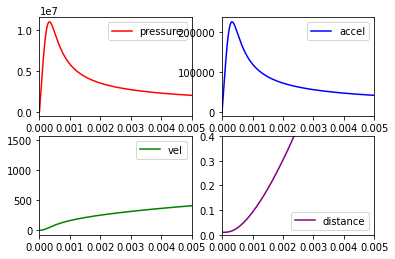

In [204]:
# Creating figure object
plt.figure()
max_time = 0.005 # 50ms

plt.subplot(2,2,1)
plt.plot(t, p_barrel, color="red", label = "pressure")
plt.legend()
plt.xlim([0,max_time])

plt.subplot(2,2,2)
plt.plot(t, xdotdot, color="blue", label = "accel")
plt.legend()
plt.xlim([0,max_time])

plt.subplot(2,2,3)
plt.plot(t, xdot, color="green", label = "vel")
plt.legend()
plt.xlim([0,max_time])

plt.subplot(2,2,4)
plt.plot(t, x, color="purple", label = "distance")
plt.legend()
plt.xlim([0,max_time])
plt.ylim([0, L])

#gas leakage, barrel expansion, valve imperfection/response time, friction will lower the pressure, velocity and accel